In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path="updated_health_insurance_extended.csv"
data=pd.read_csv(path)

In [3]:
data.head()

,age,bmi,smoker,pre_existing_conditions,dependents,hospital_visits_last_year,chronic_disease,physical_activity_level,alcohol_consumption,gender,income,health_score
0,40,39.3,yes,cancer,4,7,yes,low,moderate,Male,1L-2L,681
1,20,18.7,yes,asthma,4,1,no,high,moderate,Female,2L-5L,732
2,43,15.6,no,none,3,1,yes,high,moderate,Male,2L-5L,610
3,57,27.9,yes,none,2,9,no,low,high,Male,2L-5L,581
4,65,32.2,yes,hypertension,4,10,yes,high,high,Male,1L-2L,485


In [4]:
data['health_score'].describe()

count    100000.000000
mean        600.648060
std         173.856525
min         300.000000
25%         450.000000
50%         601.000000
75%         751.000000
max         900.000000
Name: health_score, dtype: float64

In [10]:
# print("age: ",data['age'].unique())
print("Smoker: ",data['smoker'].unique())
print("pre_existing_conditions: ",data['pre_existing_conditions'].unique())
print("dependents: ",data['dependents'].unique()) 
#print("hospital_visits_last_year: ",data['hospital_visits_last_year'].unique())
print("chronic diseases: ",data['chronic_disease'].unique())
print("physical activity level: ",data['physical_activity_level'].unique())
print("alcohol consumption: ",data['alcohol_consumption'].unique())


Smoker:  ['yes' 'no']
pre_existing_conditions:  ['cancer' 'asthma' 'none' 'hypertension' 'diabetes']
dependents:  [4 3 2 1 5 0]
chronic diseases:  ['yes' 'no']
physical activity level:  ['low' 'high' 'moderate']
alcohol consumption:  ['moderate' 'high' 'low' 'none']


In [11]:
data.isna().sum()

age                          0
bmi                          0
smoker                       0
pre_existing_conditions      0
dependents                   0
hospital_visits_last_year    0
chronic_disease              0
physical_activity_level      0
alcohol_consumption          0
gender                       0
income                       0
health_score                 0
dtype: int64

In [12]:
health_score_thr= data['health_score'].median()
print(health_score_thr)

601.0


In [13]:
data['Prominence']=(data['health_score']>=health_score_thr).astype(int)

In [14]:
data.head()

,age,bmi,smoker,pre_existing_conditions,dependents,hospital_visits_last_year,chronic_disease,physical_activity_level,alcohol_consumption,gender,income,health_score,Prominence
0,40,39.3,yes,cancer,4,7,yes,low,moderate,Male,1L-2L,681,1
1,20,18.7,yes,asthma,4,1,no,high,moderate,Female,2L-5L,732,1
2,43,15.6,no,none,3,1,yes,high,moderate,Male,2L-5L,610,1
3,57,27.9,yes,none,2,9,no,low,high,Male,2L-5L,581,0
4,65,32.2,yes,hypertension,4,10,yes,high,high,Male,1L-2L,485,0


<Axes: xlabel='Prominence'>

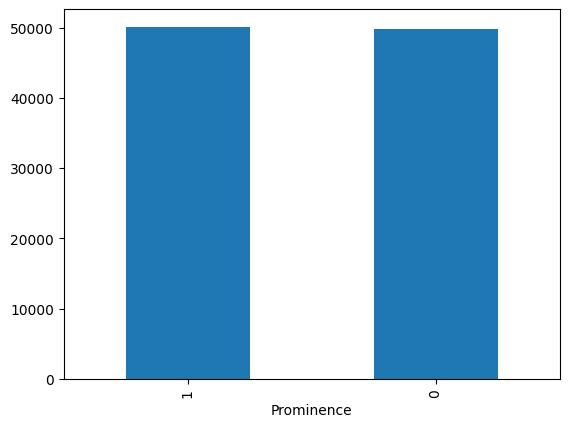

In [15]:
data['Prominence'].value_counts().plot(kind='bar')

In [16]:
print("\nProminence value counts:")
print(data['Prominence'].value_counts())


Prominence value counts:
Prominence
1    50126
0    49874
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
data.describe()

,age,bmi,dependents,hospital_visits_last_year,health_score,Prominence
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49.10905,27.538518,2.498100,5.000860,600.648060,0.501260
std,18.18111,7.223322,1.710668,3.157112,173.856525,0.500001
min,18.00000,15.000000,0.000000,0.000000,300.000000,0.000000
25%,33.00000,21.300000,1.000000,2.000000,450.000000,0.000000
50%,49.00000,27.600000,2.000000,5.000000,601.000000,1.000000
75%,65.00000,33.800000,4.000000,8.000000,751.000000,1.000000
max,80.00000,40.000000,5.000000,10.000000,900.000000,1.000000


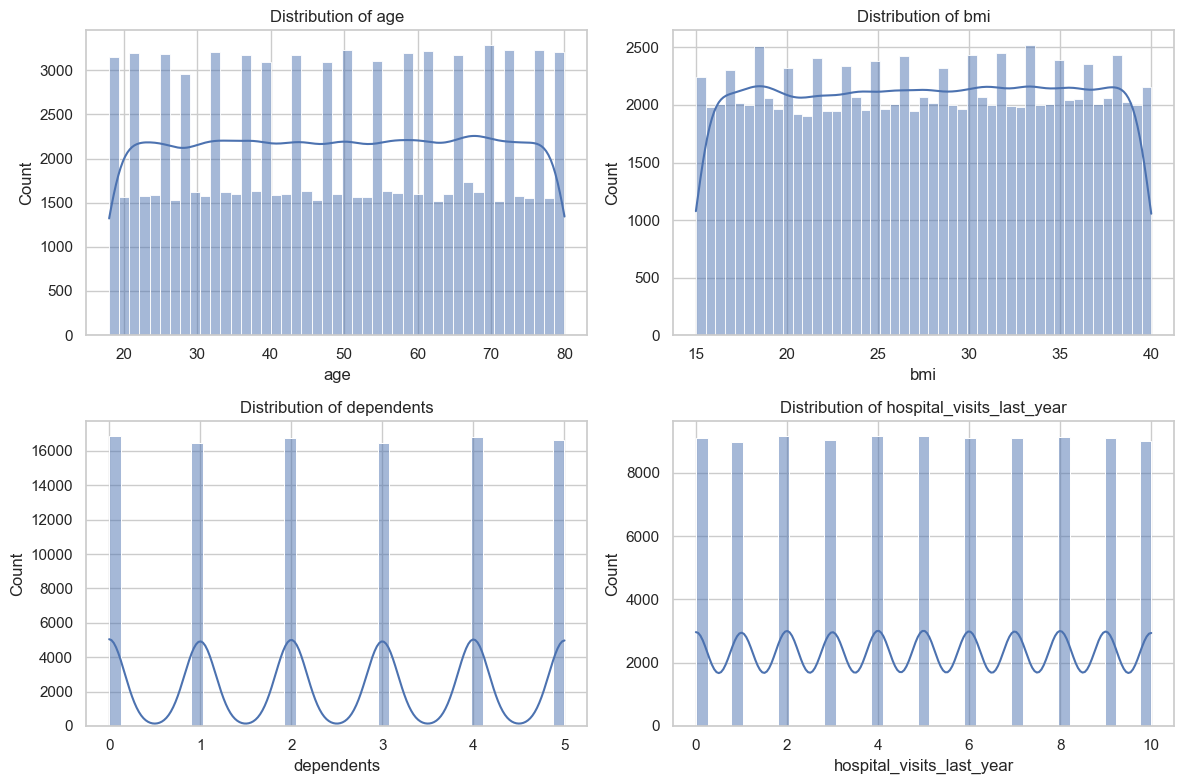

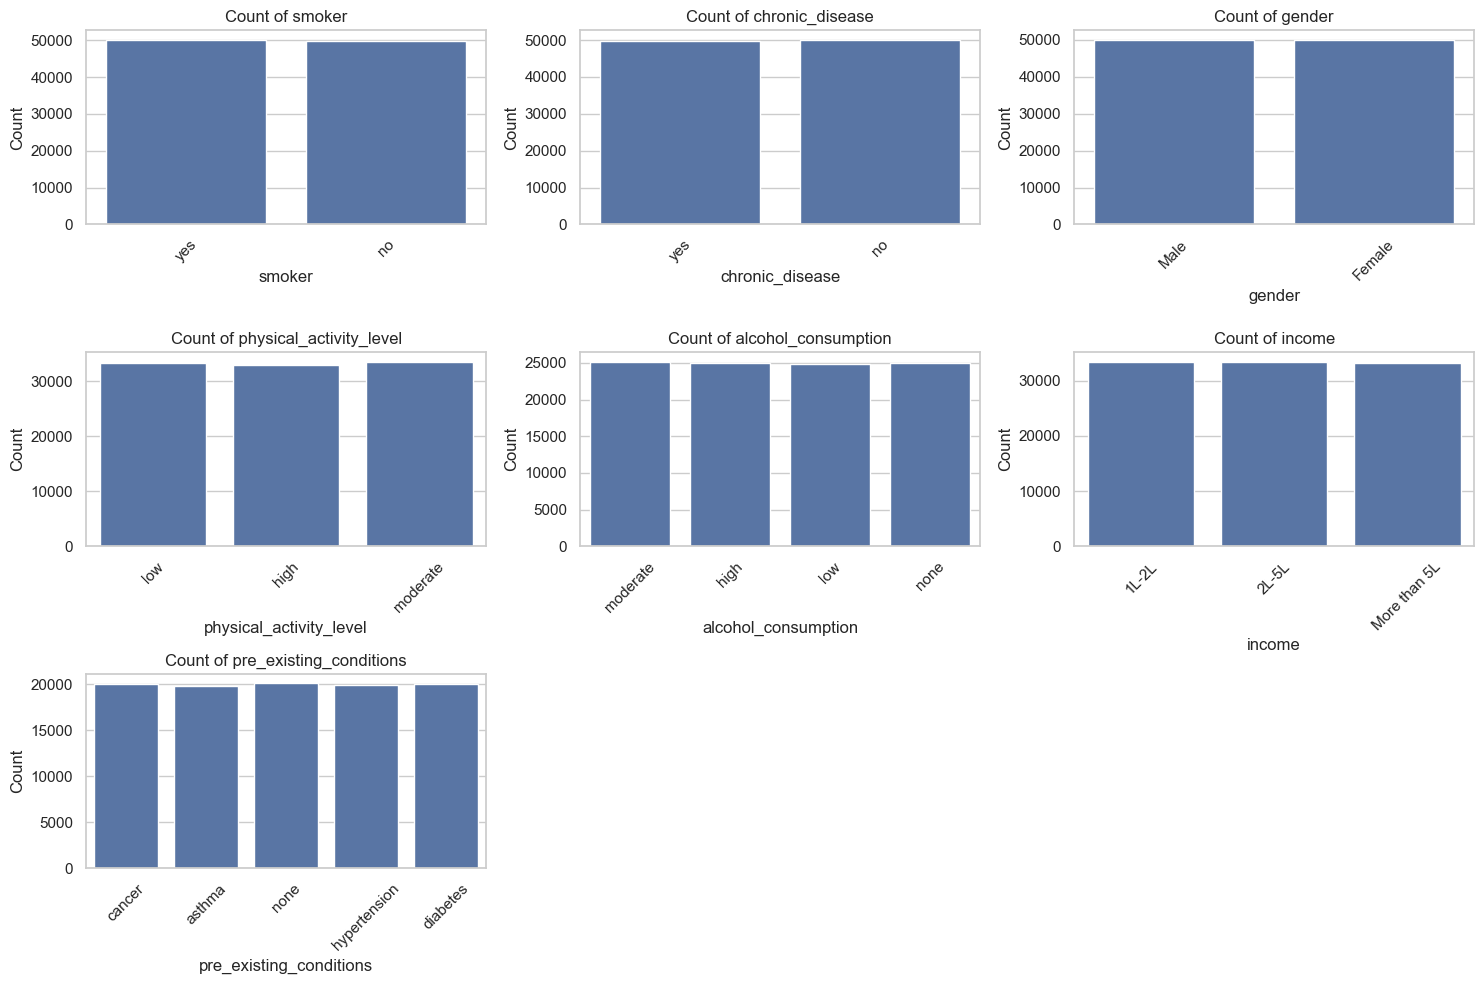

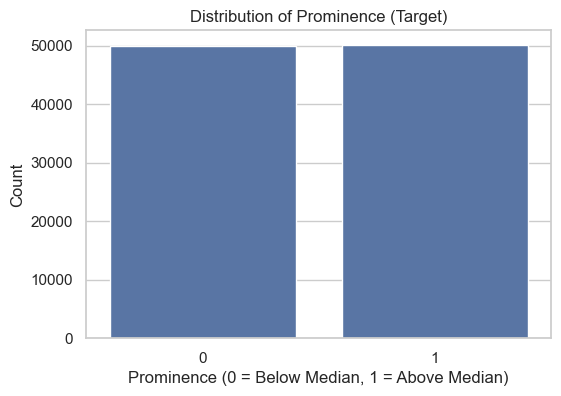

Missing values:
age                          0
bmi                          0
smoker                       0
pre_existing_conditions      0
dependents                   0
hospital_visits_last_year    0
chronic_disease              0
physical_activity_level      0
alcohol_consumption          0
gender                       0
income                       0
Prominence                   0
dtype: int64


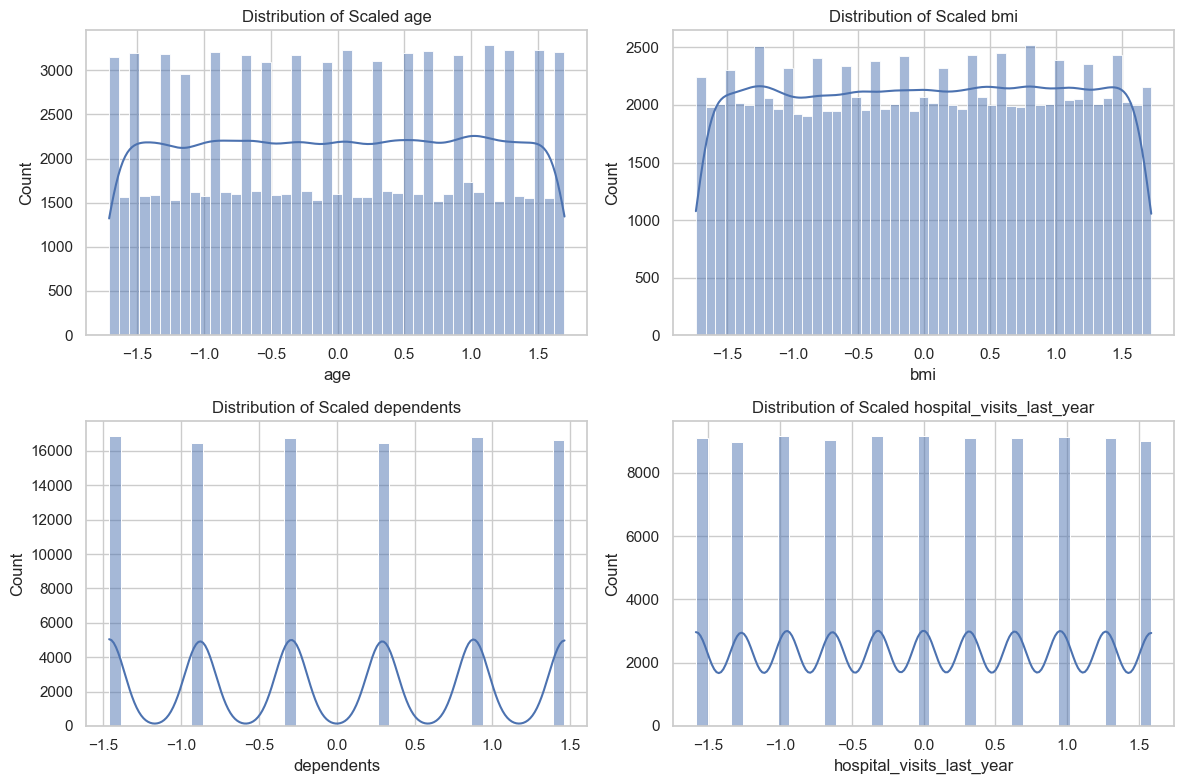


Preprocessed features (first 5 rows):
        age       bmi  smoker  dependents  hospital_visits_last_year  \
0 -0.501020  1.628273       1    0.877965                   0.633221   
1 -1.601068 -1.223615       1    0.877965                  -1.267259   
2 -0.336013 -1.652782       0    0.293396                  -1.267259   
3  0.434021  0.050044       1   -0.291174                   1.266714   
4  0.874041  0.645341       1    0.877965                   1.583461   

   chronic_disease  physical_activity_level  alcohol_consumption  gender  \
0                1                        1                    2       1   
1                0                        0                    2       0   
2                1                        0                    2       1   
3                0                        1                    0       1   
4                1                        0                    0       1   

   income  pre_existing_conditions_cancer  pre_existing_conditions_diab

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Load the data
path = "updated_health_insurance_extended.csv"
data = pd.read_csv(path)

# Create Prominence column
health_score_thr = data['health_score'].median()
data['Prominence'] = (data['health_score'] >= health_score_thr).astype(int)

# Step 1: Define columns
numerical_cols = ['age', 'bmi', 'dependents', 'hospital_visits_last_year']
categorical_label_cols = ['smoker', 'chronic_disease', 'gender', 'physical_activity_level', 'alcohol_consumption', 'income']
categorical_onehot_cols = ['pre_existing_conditions']
target_col = 'Prominence'

# --- Visualization 1: Numerical Features Distribution (Before Scaling) ---
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- Visualization 2: Categorical Features Distribution ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_label_cols + categorical_onehot_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Visualization 3: Target Variable (Prominence) Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Prominence', data=data)
plt.title('Distribution of Prominence (Target)')
plt.xlabel('Prominence (0 = Below Median, 1 = Above Median)')
plt.ylabel('Count')
plt.show()

# Drop health_score to avoid data leakage
data = data.drop(columns=['health_score'])

# Step 2: Verify no missing values
print("Missing values:")
print(data.isnull().sum())

# Step 3: Encode categorical variables
# Label Encoding for binary and ordinal columns
le = LabelEncoder()
for col in categorical_label_cols:
    data[col] = le.fit_transform(data[col])

# One-Hot Encoding for pre_existing_conditions (use dtype=int for 0/1)
data = pd.get_dummies(data, columns=categorical_onehot_cols, drop_first=True, dtype=int)

# Step 4: Separate features and target
X = data.drop(columns=[target_col])
y = data[target_col]

# Step 5: Normalize/Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# --- Visualization 4: Numerical Features After Scaling ---
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of Scaled {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Display the preprocessed data
print("\nPreprocessed features (first 5 rows):")
print(X.head())
print("\nTarget (first 5 rows):")
print(y.head())

# Check the shape of the final dataset
print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

In [4]:
X.head()

,age,bmi,smoker,dependents,hospital_visits_last_year,chronic_disease,physical_activity_level,alcohol_consumption,gender,income,pre_existing_conditions_cancer,pre_existing_conditions_diabetes,pre_existing_conditions_hypertension,pre_existing_conditions_none
0,-0.501020,1.628273,1,0.877965,0.633221,1,1,2,1,0,1,0,0,0
1,-1.601068,-1.223615,1,0.877965,-1.267259,0,0,2,0,1,0,0,0,0
2,-0.336013,-1.652782,0,0.293396,-1.267259,1,0,2,1,1,0,0,0,1
3,0.434021,0.050044,1,-0.291174,1.266714,0,1,0,1,1,0,0,0,1
4,0.874041,0.645341,1,0.877965,1.583461,1,0,0,1,0,0,0,1,0


In [5]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Prominence, dtype: int32

'Prominence' not found in X columns.

Columns in X:
['age', 'bmi', 'smoker', 'dependents', 'hospital_visits_last_year', 'chronic_disease', 'physical_activity_level', 'alcohol_consumption', 'gender', 'income', 'pre_existing_conditions_cancer', 'pre_existing_conditions_diabetes', 'pre_existing_conditions_hypertension', 'pre_existing_conditions_none']

Shape of X: (100000, 14)
Shape of y: (100000,)

Shape of X_train: (80000, 14)
Shape of X_test: (20000, 14)
Shape of y_train: (80000,)
Shape of y_test: (20000,)
Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.4941 - loss: 0.7121 - val_accuracy: 0.4983 - val_loss: 0.6966
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.4968 - loss: 0.6948 - val_accuracy: 0.4990 - val_loss: 0.6942
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4988 - loss: 0.6939 - val_accuracy: 0.5013 - val_loss: 0.6944
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5043 - loss: 0.6935 -

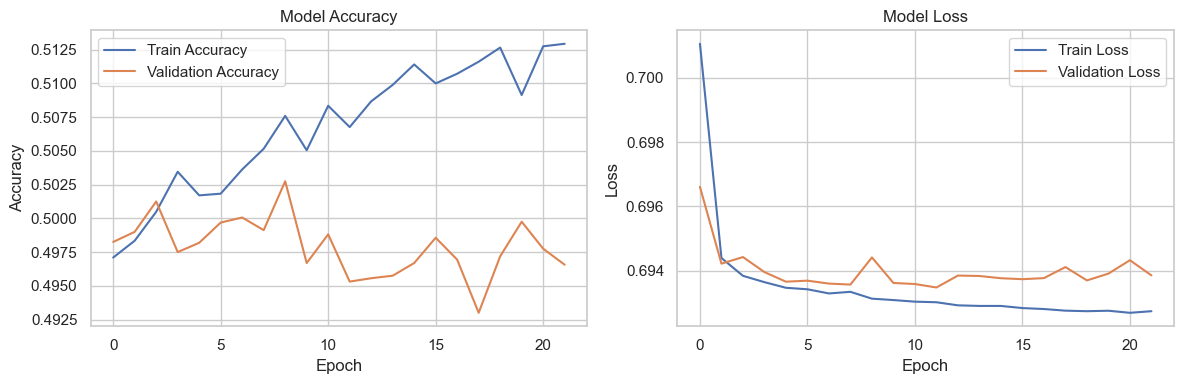

Model saved as 'prominence_model.h5'
Scaler saved as 'scaler.pkl'
LabelEncoder for smoker saved as 'le_smoker.pkl'
LabelEncoder for chronic_disease saved as 'le_chronic_disease.pkl'
LabelEncoder for gender saved as 'le_gender.pkl'
LabelEncoder for physical_activity_level saved as 'le_physical_activity_level.pkl'
LabelEncoder for alcohol_consumption saved as 'le_alcohol_consumption.pkl'
LabelEncoder for income saved as 'le_income.pkl'


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# Assuming 'data' is the original DataFrame before encoding
# Define columns
numerical_cols = ['age', 'bmi', 'dependents', 'hospital_visits_last_year']
categorical_label_cols = ['smoker', 'chronic_disease', 'gender', 'physical_activity_level', 'alcohol_consumption', 'income']
categorical_onehot_cols = ['pre_existing_conditions']
target_col = 'Prominence'

# Step 1: Verify and fix X (ensure Prominence is excluded)
if 'Prominence' in X.columns:
    X = X.drop(columns=['Prominence'])
    print("Removed 'Prominence' from X.")
else:
    print("'Prominence' not found in X columns.")

# Debugging: Check columns and shape
print("\nColumns in X:")
print(X.columns.tolist())
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging: Check shapes
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Step 3: Build simple ANN
model = Sequential([
    Input(shape=(14,)),  # Explicit Input layer (13 features)
    Dense(10, activation='relu'),  # Hidden layer with 10 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Step 7: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Save the model
model.save('prominence_model.h5')
print("Model saved as 'prominence_model.h5'")

# Step 9: Save the scaler
scaler = StandardScaler()
scaler.fit(X[numerical_cols])
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

# Step 10: Save label encoders
# Assuming 'data' is the original DataFrame before encoding
label_encoders = {}
for col in categorical_label_cols:
    le = LabelEncoder()
    le.fit(data[col])  # Fit on original categorical values
    label_encoders[col] = le
    joblib.dump(le, f'le_{col}.pkl')
    print(f"LabelEncoder for {col} saved as 'le_{col}.pkl'")

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(X_train.columns))

(80000, 14)
(20000, 14)
(80000,)
(20000,)
14
